# WiDS DATATHON WORKSHOP
## FEBRUARY 15, 2020
<img src="images/inst_logos.png" alt="Harvard IACS" style="height: 80px;" align="left"/>

### INSTRUCTORS: 
- **Karren Yang (MIT)**
- **Weiwei Pan (Harvard IACS)**

### Task: Predicting Patient Survival
 
The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival.

### Part I. Data exploration and preprocessing
### Part II. ML and classification algorithms
* What is supervised learning?
* Models/algorithms for classification:
    * Logistic Regression
    * Decision Trees
    * Neural Networks
    * Ensemble Methods
* Evaluation metrics

## Predicting patient survival is a supervised learning problem
* Supervised learning: 
    * Training data includes target outcomes
    * Learn a model that predicts the outcomes


* Unsupervised learning: 
    * Training data does not include targets
    * Learn a model that captures structure of the data (e.g. clustering)

<img src="images/supervised_vs_unsupervised.png" alt="" style="height: 250px;" align="center"/>

## Supervised learning in a nutshell
* We have a set of observations, called **training data** $\{(\mathbf{x}_1, y_1),\ldots, (\mathbf{x}_N, y_N)\}$
    * $\mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_N$ are features belonging to a feature space $\mathcal{X}$
    * $y_1, y_2, \cdots, y_N$ are the target outcomes belong to outcome space $\mathcal{Y}$


* The **model** is a function that maps from feature space to outcome space: $f: \mathcal{X} \rightarrow \mathcal{Y}$
    * The function depends on coefficients or constants that are called **parameters**. 
    * E.g. linear regression has parameters $\mathbf{w}$
$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x}
$$


* **Fitting/training** the model means optimizing these parameters to best explain the training data
* **Evaluating** the model means making predictions $\widehat{y}_i = f(\mathbf{x}_i)$ and comparing them to the true outcomes $y_i$
    * E.g. linear regression uses mean-squared error:

$$
\min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^N \left(\mathbf{w}^T \mathbf{x}_i - y_i \right)^2
$$
    


## Classification vs. Regression
* Regression - outcome $y$ is continuous
* Classification - outcome $y$ is categorical
<img src="images/classification_vs_regression.png" alt="" style="height: 300px;" align="center"/>

## Predicting patient survival is binary classification problem

* Our **training data** $\{(\mathbf{x}_1, y_1),\ldots, (\mathbf{x}_N, y_N)\}$ contains about 90,000 samples
    * $\mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_N$ are features in $\mathbb{R}^D$
    * $y_1, y_2, \cdots, y_N$ are the patient survival labels belong to $\{0, 1\}$ (0 = survived, 1 = died)


* We will consider different **models** that map features to patient survival outcomes: 

$$f: \mathbb{R}^D \rightarrow \{0, 1\}$$

* Many algorithms take a **probabilistic** approach to modeling (why?):
    * Learn function $g: \mathbb{R}^D \rightarrow [0,1]$ that maps features to the **probability** of the outcome being 1, i.e. probability that patient dies
    * The function $f$ is obtained by applying a threshold of 0.5 to the output of $g$

### Example: Logistic Regression
We model the probability of patient death using $g_\mathbf{w}(\mathbf{x})$, defined as,
$$ g_\mathbf{w}(\mathbf{x}) = \sigma \left( \mathbf{w}^T\mathbf{x}\right), $$

* $\mathbf{w} \in \mathbb{R}^D$ is a **parameter** vector with the same dimensionality as the features $\mathbf{x}$
* $\sigma: \mathbb{R} \rightarrow [0,1]$ is the **sigmoid/logistic function** 
     
 <img src="images/decision_boundary3.png" alt="" style="height: 200px;" align="center"/>



### How to interpret the model?

* The sigmoid function *squashes* real values to probabilities in the range $(0,1)$
    * Positive values lead to probabilities greater than 0.5 (i.e. prediction is patient death)
    * Negative values lead to probabilities less than 0.5 (i.e. prediction is patient survival)


* Therefore, the sign of the linear function inside the sigmoid determines the prediction
    * $\mathbf{w}^T\mathbf{x} > 0 \implies \sigma(\mathbf{w}^T\mathbf{x}) > 0.5 \implies $ prediction of patient death
    * $\mathbf{w}^T\mathbf{x} < 0 \implies \sigma(\mathbf{w}^T\mathbf{x}) < 0.5 \implies $ prediction of patient survival
    * $\mathbf{w}^T\mathbf{x} = 0 \implies \sigma(\mathbf{w}^T\mathbf{x}) = 0.5 \implies $ equal likelihood
    * So $\mathbf{w}^T\mathbf{x} = 0$ is the linear decision boundary
    

* The sign of each of the parameters $\mathbf{w} = [w_1, w_2, \cdots, w_D]$ indicates whether each feature contributes positively or negatively to the outcome

### Let's apply it to the patient survival dataset

* Read and manipulate data using pandas and numpy libraries
* Logistic regression is implemented in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# read in preprocessed dataset
data = pd.read_csv('data/preprocessed.csv')

# separate features from outcomes
X = np.array(data.iloc[:,1:])
y = np.array(data.iloc[:,0])

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# run logistic regression on a random subset of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

### How should we evaluate the model?

* Key purpose of learning: we want our models to generalize to new unseen data
    * Train on a subset of the data ("training set")
    * Evaluate on a held-out subset of the data ("test set")


* Classification accuracy: determine on average how often the prediction matches the real outcome
$$
\frac{1}{N} \sum_{i=1}^N \mathbb{1}\left(f(\mathbf{x}_i) = y_i\right)
$$

In [3]:
clf.score(X_test, y_test)

0.9196467509812473

###  Receiver operating characteristic (ROC) curve
* Classification accuracy problematic for evaluating patient survival models (why?)
* Alternative: Plot true positive rate (TPR) against the false positive rate (FPR) at various threshold settings

$$TPR = \frac{TP}{TP + FN}, \quad FPR = \frac{FP}{FP + TN}$$

* Area under the ROC curve (AUC) - single number which reflects model's performance 
<img src="images/roc_thresholds.png" alt="" style="height: 200px;" align="center"/>

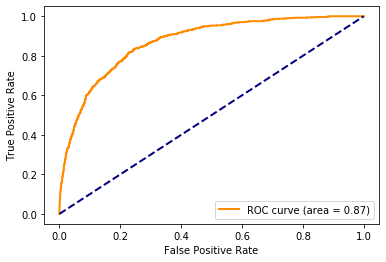

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# compute FPR and TPR
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# compute area under the curve
roc_auc = auc(fpr, tpr)

# plot
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Generalizing the logistic regression model

* What if the data is too complex to be separated by a linear decision boundary?

In [5]:
# function to generate some toy data for classification
def generate_toy_data(rand_state):
    data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
    data = np.hstack((data, np.zeros((200, 1))))
    data[data[:, 0]**2 + data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], 
                                                                     len(data[data[:, 0]**2 + data[:, 1]**2 < 3**2]), 
                                                                     p=[0.2, 0.8])
    X = data[:, :-1]
    y = data[:, -1]
    
    return X, y

def generate_and_plot_complex_data(rand_state):
    # generate more complicated toy data
    X, y = generate_toy_data(rand_state)
    # plot data and decision boundary of logistic regression
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    # plot class 1
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
    # plot class 0
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0', alpha=0.3)
    # label axes
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    # label title
    ax.set_title('Toy Data for Binary Classification')
    # add legend
    ax.legend()
    # add x, y limits
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])

    plt.tight_layout()
    plt.show()
    
    return X, y

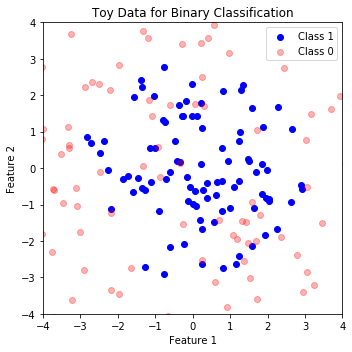

In [6]:
toy_X, toy_y = generate_and_plot_complex_data(rand_state=2)

### Generalizing the logistic regression model

* Recall: logistic regression models the probability of patient death using $g_\mathbf{w}(\mathbf{x})$, defined as,

$$ g_\mathbf{w}(\mathbf{x}) = \sigma \left( \mathbf{w}^T\mathbf{x}\right), $$

* We can replace $\mathbf{w}^T\mathbf{x}$ with a more complex function $h_\mathbf{\theta}(\mathbf{x})$ where $\theta$ is the set of learnable parameters


* Example 1: logistic regression with quadratic decision boundary, $\theta = \{\mathbf{W}_1, \mathbf{w}_2\}$

$$ h_\theta(\mathbf{x}) = \mathbf{x}^T \mathbf{W}_1 \mathbf{x} + \mathbf{w}_2 \mathbf{x}$$

* Example 2: neural network classification, letting $h_\theta(\mathbf{x})$ be a neural network (will see more later)

### Another Example of Binary Classification: Decision Trees

* People naturally use **decision trees** (flow charts) for classifying various phenomena:
<img src="images/dt_partition.png" alt="" style="height: 300px;"/>

* Our **model** is $f: \mathbb{R}^D \rightarrow \{0,1\}$ can also be a decision tree.
    * Every *branch* in the tree corresponds to hyperplane that splits up the feature space into two
    * Every intersection of half-spaces receives a prediction of 0 or 1

### Fitting a decision tree on training data:
1. Start with an empty decision tree (undivided feature space)
2. Choose the 'optimal' predictor on which to split based on criterion (e.g. purity of classes)
3. Recurse on on each new node until some stopping condition is met (e.g. reached max depth of tree)

In [7]:
from sklearn import tree

# create a decision tree model
tree_model = tree.DecisionTreeClassifier(max_depth=3)
# fit decision tree model
tree_model.fit(toy_X, toy_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Tuning the model hyperparameters

* Stopping condition and splitting condition need to be determined before running the algorithm
* How do we choose these **hyperparameters**?


One (poor) strategy:
* Optimize hyperparameters on the training data
* Performance on the training data generally increases with model complexity
* However, this does not necessarily translate to the test data (**overfitting** the training data)

In [8]:
def shallow_vs_deep(X, y):
    depths = [3, 4, 10, 20]
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax = ax.flatten()
    for i, depth in enumerate(depths):
        # create a decision tree model
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        # fit decision tree model
        tree_model.fit(X, y)
        # plot decision boundary
        ax[i] = plot_decision_boundary(X, y, tree_model, 
                                       'Decision Tree (depth = ' + str(depth) + ')', 
                                       ax[i], bounds=(-6, 7), poly_flag=False)
        # set x, y limits
        ax[i].set_xlim([-4, 4])
        ax[i].set_ylim([-4, 4])

    plt.tight_layout()
    plt.show()
    
def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='blue')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='red', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Blues')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    return ax

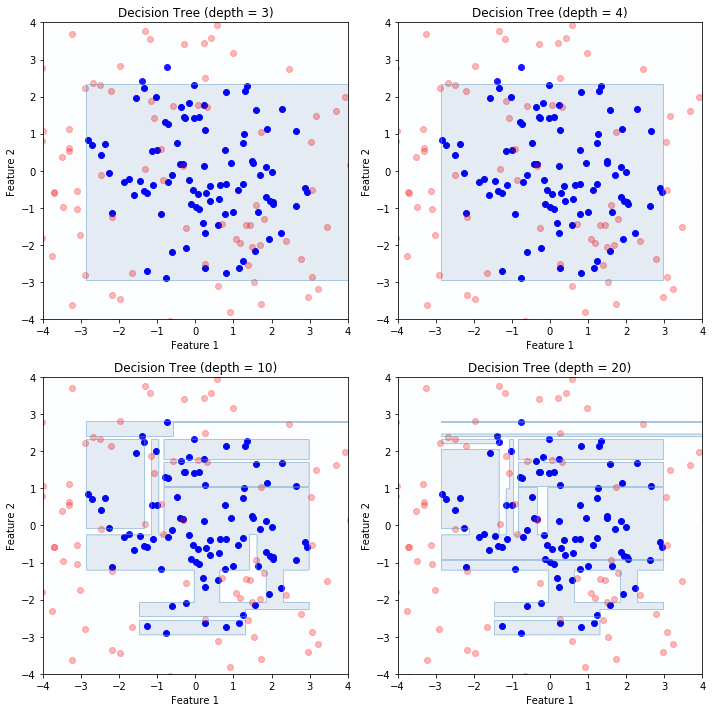

In [9]:
shallow_vs_deep(toy_X, toy_y)

### Tuning the model hyperparameters

Better strategy: 
* Split training data into "train" and "validation" subsets
* Choose hyperparameters resulting in best performance on the validation subset
* We can even repeat this multiple times to reduce variance (e.g. k-fold cross-validation)

### Let's apply this to the patient survival dataset
* First determine the optimal tree depth

In [10]:
# split training data randomly
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

hyperparameters = list(range(1,15))
auc_list = []

for hyperparam in hyperparameters:
    # create a decision tree model
    tree_model = tree.DecisionTreeClassifier(max_depth=hyperparam, random_state=2)
    # fit decision tree model to the training data
    tree_model.fit(X_train_, y_train_)
    # obtain the learned decision function and evaluate it on the held-out data
    y_pred_scores = tree_model.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_scores) # obtain false positive and true positive rates
    area_under_curve = auc(fpr, tpr)
    auc_list.append(area_under_curve)

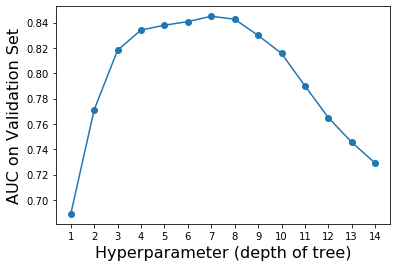

In [11]:
# plot AUC for different hyperparameter values
plt.plot(hyperparameters, auc_list, '-o')
plt.xlabel('Hyperparameter (depth of tree)', fontsize=16)
plt.ylabel('AUC on Validation Set', fontsize=16)
# change x axis tick labels
plt.xticks(hyperparameters)
plt.show()

* The optimal tree depth is 7 based on evaluating on the validation data
* Now, let's train on all of the data with tree depth = 7 and evaluate on the test data

In [12]:
# create a decision tree model
tree_model = tree.DecisionTreeClassifier(max_depth=7)
# fit decision tree model to the training data
tree_model.fit(X_train, y_train)
# obtain the learned decision function and evaluate it on the held-out data
y_pred_scores = tree_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_scores) # obtain false positive and true positive rates
area_under_curve = auc(fpr, tpr)
print('AUC on test set = {0:.2f}'.format(area_under_curve))

AUC on test set = 0.85
